<a href="https://colab.research.google.com/github/Cumberkid/Learning-the-Optimal-Solution-Path/blob/main/experiments/Eigenvalues_of_Basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import math
from scipy.special import legendre
import matplotlib.pyplot as plt

def generate_monomials(lambda_value, p):
    return np.array([lambda_value**i for i in range(p)])


def scaled_legendre(lam, p):
    # Transform the lam to [-1, 1] interval
    lam_transformed = 2 * lam - 1

    # Compute the first p Legendre polynomials
    polynomials = [math.sqrt(2*n+1) * legendre(n)(lam_transformed) for n in range(p)]

    return np.array(polynomials)


In [ ]:
# Test
p = 3
lambda_value = .2
v  = generate_monomials(lambda_value, p)
print(np.outer(v, v))


[[1.     0.2    0.04  ]
 [0.2    0.04   0.008 ]
 [0.04   0.008  0.0016]]


In [ ]:
# Test
p = 3
lambda_value = .2
v  = scaled_legendre(lambda_value, p)
print(v)
print(np.outer(v, v))

[ 1.         -1.03923048  0.08944272]
[[ 1.         -1.03923048  0.08944272]
 [-1.03923048  1.08       -0.0929516 ]
 [ 0.08944272 -0.0929516   0.008     ]]


In [ ]:
#monomials by simulation
def simExpectation_monomial(p, numPaths):
    random.seed(8675309)
    out = np.zeros((p, p))
    for i in range(numPaths):
        lam = random.uniform(0, 1)
        v = generate_monomials(lam, p)
        out = out + np.outer(v, v)

    return(out/numPaths)


#legendre by simulation
def simExpectation_legendre(p, numPaths):
    random.seed(8675309)
    out = np.zeros((p, p))
    for i in range(numPaths):
        lam = random.uniform(0, 1)
        v = scaled_legendre(lam, p)
        out = out + np.outer(v, v)

    return(out/numPaths)

In [ ]:
def C_monomial(p, numPts):
    lams = np.linspace(0, 1, numPts)
    C = 0
    for lam in lams:
        v = generate_monomials(lam, p)
        out = np.outer(v, v)
        eig = max(np.linalg.eigvals(out))
        C = max(C, eig)

    return C

def C_legendre(p, numPts):
    lams = np.linspace(0, 1, numPts)
    C = 0
    for lam in lams:
        v = scaled_legendre(lam, p)
        out = np.outer(v, v)
        eig = max(np.linalg.eigvals(out))
        C = max(C, eig)

    return C

In [ ]:
pt_grid = range(1, 11)

C_mon = np.array([C_monomial(p, 100) for p in pt_grid])
c_mon = np.array([min(np.linalg.eigvals(simExpectation_monomial(p, 10000))) for p in pt_grid])

In [ ]:
pt_grid = range(1, 21)

C_leg = np.array([C_legendre(p, 100) for p in pt_grid])
c_leg = np.array([min(np.linalg.eigvals(simExpectation_legendre(p, 10000))) for p in pt_grid])

In [ ]:
np.linalg.eigvals(simExpectation_monomial(5, 5000))

array([1.55918349e+00, 2.09352006e-01, 1.14577057e-02, 3.15458593e-04,
       3.37131519e-06])

In [ ]:
c_mon

array([1.00000000e+00, 6.60740561e-02, 2.66528858e-03, 1.00301357e-04,
       3.37131519e-06, 1.11198521e-07, 3.59231910e-09, 1.15472419e-10,
       3.56808894e-12, 1.11503752e-13])

In [ ]:
import matplotlib as mpl

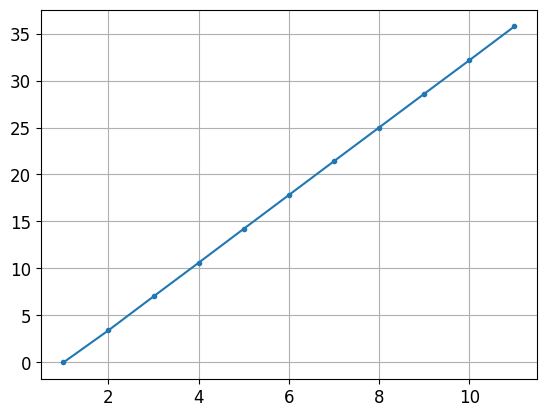

In [ ]:
plt.plot(pt_grid[0:11], np.log(C_mon[0:11]/c_mon[0:11]), ".-")
mpl.rcParams['font.size'] = 12
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


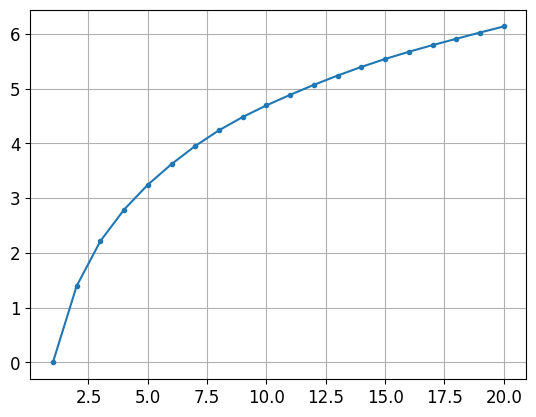

In [ ]:
plt.plot(pt_grid, np.log(C_leg/c_leg), ".-")
mpl.rcParams['font.size'] = 12
plt.grid(True)

In [ ]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

class SplineBasis:
    def __init__(self, knots, order):
      self.order = order
      #pad the knots
      taus = np.hstack((knots[0] * np.ones(order - 1), knots, knots[-1] * np.ones(order - 1)))
      #iterate through and create separate spline objects
      self.basis = []
      numBasis = len(knots) + order - 2
      for i in range(numBasis):
        ei = np.zeros(numBasis)
        ei[i] = 1.
        spl = BSpline(taus, ei, order - 1)
        self.basis.append(spl)

    def __call__(self, pt):
      return( [float(b(pt)) for b in self.basis] )

    def numBasisFns(self):
      return(len(self.basis))

In [ ]:
def C_bspline(numKnot, numPts):
    knots = np.linspace(0, 1, numKnot)
    spline_basis = SplineBasis(knots, 4)
    lams = np.linspace(0, 1, numPts)
    C = 0
    for lam in lams:
        v = spline_basis(lam)
        out = np.outer(v, v)
        eig = max(np.linalg.eigvals(out))
        C = max(C, eig)

    return C

In [ ]:
knot_grid = np.arange(4, 21)
knot_grid

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
C_bsp = np.array([C_bspline(k, 100) for k in knot_grid])
C_bsp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
import random
def simExpectation_bspline(numKnot, numPaths):
    random.seed(8675309)
    knots = np.linspace(0, 1, numKnot)
    spline_basis = SplineBasis(knots, 4)
    p = spline_basis.numBasisFns()
    out = np.zeros((p, p))
    for i in range(numPaths):
        lam = random.uniform(0, 1)
        v = spline_basis(lam)
        out = out + np.outer(v, v)

    return(out/numPaths)

In [ ]:
c_bsp = np.array([min(np.linalg.eigvals(simExpectation_bspline(k, 10000))) for k in knot_grid])
c_bsp

array([0.00768566, 0.00690163, 0.00614678, 0.00540716, 0.00488439,
       0.00434677, 0.00397514, 0.00361149, 0.00327473, 0.00301422,
       0.00280933, 0.00260661, 0.00242261, 0.00225497, 0.00210809,
       0.00198319, 0.00187487])

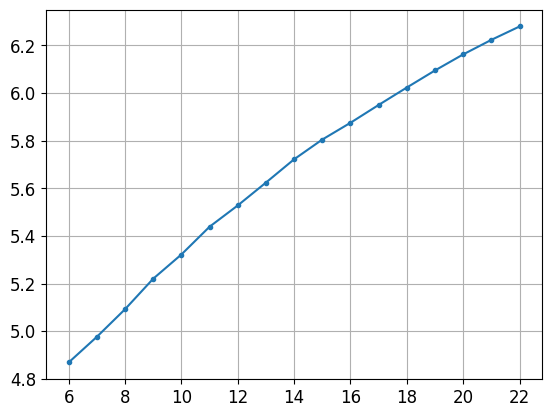

In [ ]:
plt.plot(knot_grid+4-2, np.log(C_bsp/c_bsp), ".-")
mpl.rcParams['font.size'] = 12
plt.grid(True)

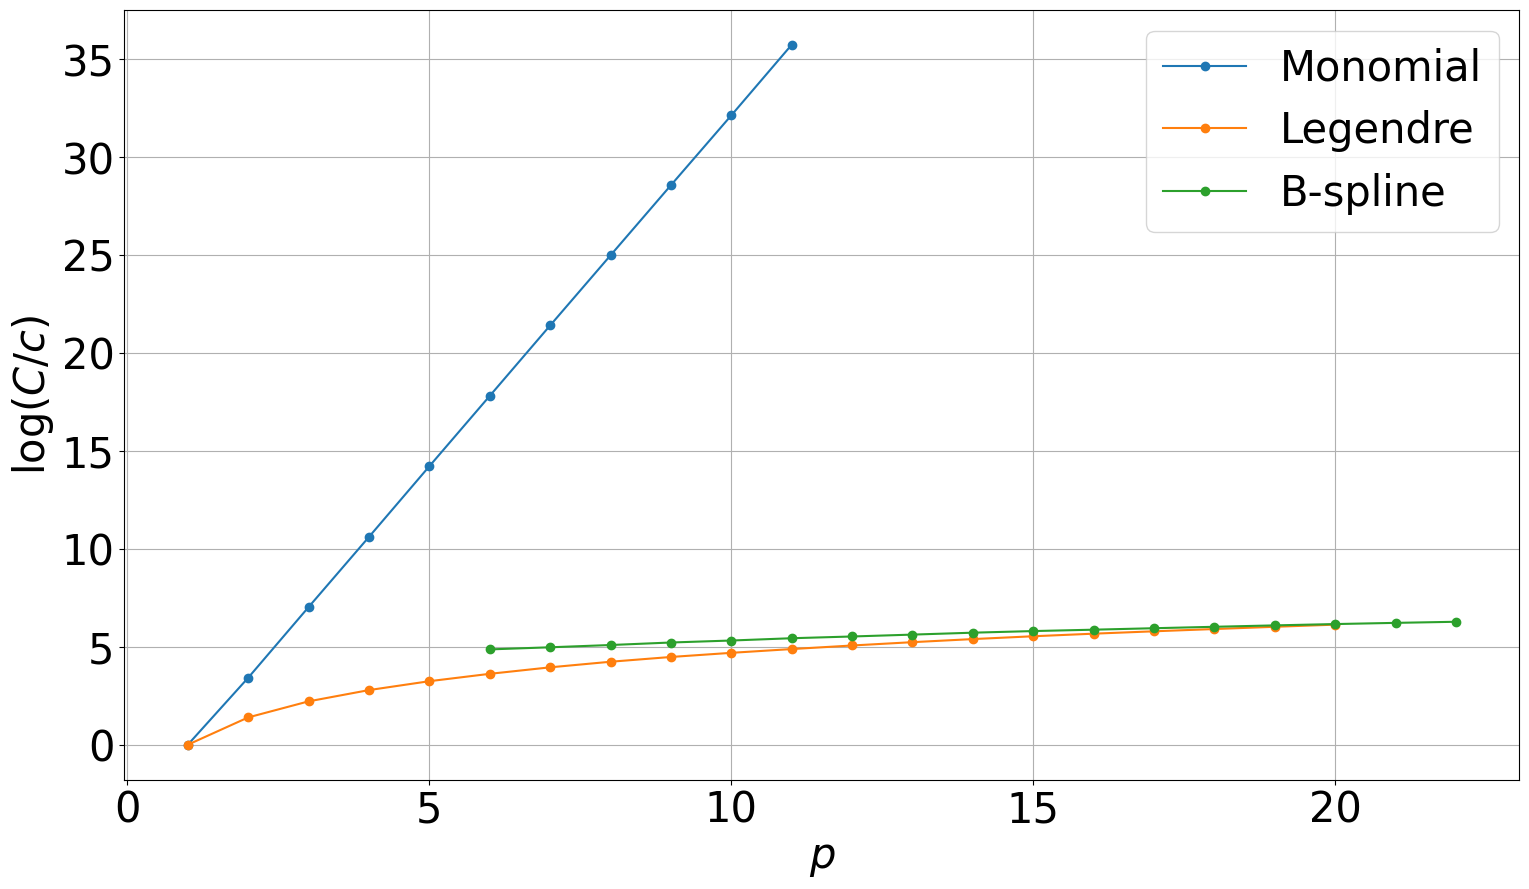

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(pt_grid[0:11], np.log(C_mon[0:11]/c_mon[0:11]), "o-", label="Monomial")
plt.plot(pt_grid, np.log(C_leg/c_leg), "o-", label="Legendre")
plt.plot(knot_grid+4-2, np.log(C_bsp/c_bsp), "o-", label="B-spline")

font_size = 30
mpl.rcParams['font.size'] = 30
plt.legend(fontsize=font_size)
plt.ylabel('$\\log (C/c)$', fontsize=font_size)
plt.xlabel('$p$', fontsize=font_size)
plt.grid(True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

p = 30

#generate the matrix phi
#we are in 1D, so Phi(lam) is a column vector
basis = [np.sqrt(2*deg + 1) * np.polynomial.Legendre.basis(deg, domain=[0,1]) for deg in range(p)]

#evaluates the maximal eigenvalue at lam.  C is the supremum of this function
def sigma_max(lam):
    phi_lam = [poly(lam) for poly in basis]
    t = np.outer(phi_lam, phi_lam)
    return (max(np.linalg.eigvals(t).real))

#numerically approximate C
lam_grid = np.linspace(0, 1, 100)
out = [sigma_max(lam) for lam in lam_grid]

#Visually, the maximum is at the end points... Confirms hypothesis from wiki.
plt.plot(lam_grid, out)

In [ ]:
import csv

# Specify the file path where you want to save the CSV file
csv_file_path = '/content/drive/MyDrive/research/p_c_C.csv'

# Open the CSV file for writing
with open(csv_file_path, 'w', newline='') as csv_file:
    # Create a CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the headers
    csv_writer.writerow(['p', 'c_mon', 'C_mon', 'c_leg', 'C_leg'])

    # Write the data from your lists
    for i in range(len(p_list)):
        csv_writer.writerow([p_list[i], c_list[i], C_list[i], c_leg_list[i], C_leg_list[i]])